# 1. Membaca Data

In [4]:
#modul yang dibutuhkan
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

In [5]:
#menyambungkan file ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
df = pd.read_csv("/content/drive/My Drive/Skripsi/new_hasil_preprocessing.csv")
df

,review,rating,versi,date
0,Kenapa y aku ko g bisa chek in klo mau ke mall...,1,4.0.8,2022-01-22 15:38:48
1,Good,5,4.0.8,2022-01-22 15:38:17
2,Mantap,5,4.0.2,2022-01-22 15:36:17
3,Best applications,5,4.0.8,2022-01-22 15:29:37
4,Mantap,5,4.0.2,2022-01-22 15:29:08
...,...,...,...,...
223537,Tingkatkan trs servisnya,5,3.1.2,2021-01-22 01:13:48
223538,"Informasinya ngga akurat, di tempat saya banya...",3,3.1.3,2021-01-22 01:11:39
223539,Sudah dcek.. Tapi belum tersedia.. Diminta dat...,2,3.1.3,2021-01-22 00:58:55
223540,Aplikasi yang sangat berguna dan informatif,5,3.1.3,2021-01-22 00:47:18


In [69]:
df['date']=pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

In [70]:
df['time']=df.index.time

In [71]:
df['year'] = df.index.year
df['month'] = df.index.month
df['dayname'] = df.index.day_name()

df.head()

,review,rating,versi,time,year,month,dayname
date,,,,,,,
2022-01-22 15:38:48,Kenapa y aku ko g bisa chek in klo mau ke mall...,1,4.0.8,15:38:48,2022,1,Saturday
2022-01-22 15:38:17,Good,5,4.0.8,15:38:17,2022,1,Saturday
2022-01-22 15:36:17,Mantap,5,4.0.2,15:36:17,2022,1,Saturday
2022-01-22 15:29:37,Best applications,5,4.0.8,15:29:37,2022,1,Saturday
2022-01-22 15:29:08,Mantap,5,4.0.2,15:29:08,2022,1,Saturday


In [74]:
ulasan = df['month'].value_counts(ascending=False).reset_index()

In [75]:
ulasan

,index,month
0,9,67421
1,8,44262
2,10,38395
3,7,19651
4,1,18725
5,11,18288
6,12,10955
7,6,2687
8,4,1314
9,5,1080


In [76]:
#mengubah nama kolom
ulasan.rename(columns={'index': 'month', 'month': 'count'}, inplace=True)
ulasan

,month,count
0,9,67421
1,8,44262
2,10,38395
3,7,19651
4,1,18725
5,11,18288
6,12,10955
7,6,2687
8,4,1314
9,5,1080


In [79]:
#membuat urutan data sesuai tanggal terkini
ulasan = ulasan[['month','count']]
sorteddata = ulasan.sort_values(by='month', ascending=True, ignore_index=True) 
sorteddata

,month,count
0,1,18725
1,2,246
2,3,518
3,4,1314
4,5,1080
5,6,2687
6,7,19651
7,8,44262
8,9,67421
9,10,38395


In [80]:
sorteddata['month'].replace({1 : "Januari", 2 : "Februari", 3 : "Maret", 4 : "April", 5 : "Mei", 6 : "Juni",
                        7 : "Juli", 8 : "Agustus", 9 : "September", 10 : "Oktober", 11 : "November", 12 : "Desember"}, inplace=True)
sorteddata

,month,count
0,Januari,18725
1,Februari,246
2,Maret,518
3,April,1314
4,Mei,1080
5,Juni,2687
6,Juli,19651
7,Agustus,44262
8,September,67421
9,Oktober,38395


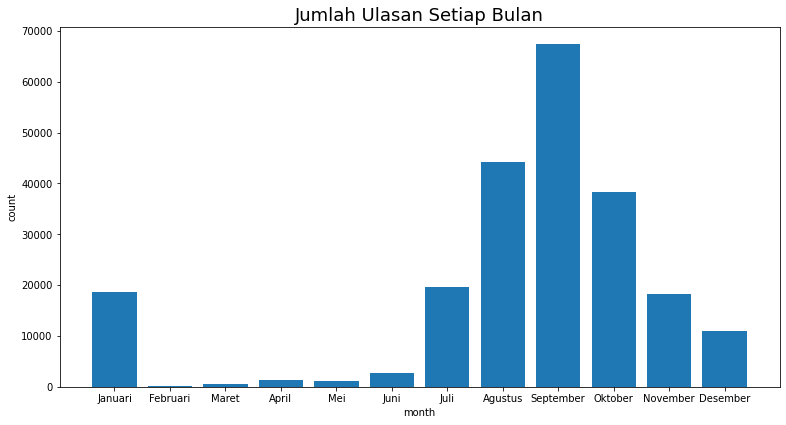

In [101]:
import matplotlib.pyplot as plt

%matplotlib inline


fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('month')
ax.set_ylabel('count')
ax.set_title('Jumlah Ulasan Setiap Bulan', size = 18)

ax.bar(sorteddata['month'],sorteddata['count'])
plt.show()

# 3. Visualisasi Data

In [6]:
df_date = pd.read_csv("/content/drive/My Drive/Skripsi/new_hasil_preprocessing.csv")
df_date

,review,rating,versi,date
0,Kenapa y aku ko g bisa chek in klo mau ke mall...,1,4.0.8,2022-01-22 15:38:48
1,Good,5,4.0.8,2022-01-22 15:38:17
2,Mantap,5,4.0.2,2022-01-22 15:36:17
3,Best applications,5,4.0.8,2022-01-22 15:29:37
4,Mantap,5,4.0.2,2022-01-22 15:29:08
...,...,...,...,...
223537,Tingkatkan trs servisnya,5,3.1.2,2021-01-22 01:13:48
223538,"Informasinya ngga akurat, di tempat saya banya...",3,3.1.3,2021-01-22 01:11:39
223539,Sudah dcek.. Tapi belum tersedia.. Diminta dat...,2,3.1.3,2021-01-22 00:58:55
223540,Aplikasi yang sangat berguna dan informatif,5,3.1.3,2021-01-22 00:47:18


In [7]:
import datetime as dt

In [8]:
#melihat perkembangan pengguna selama 4 bulan berdasarkan rata-rata rating
df_date['date'] = pd.to_datetime(df_date['date'], errors='coerce')

#sorteddata_maret20 = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2020-03']
#sorteddata_april20 = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2020-04']
#sorteddata_mei20 = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2020-05']
#sorteddata_juni20 = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2020-06']
#sorteddata_juli20 = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2020-07']
#sorteddata_agustus20 = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2020-08']
#sorteddata_september20 = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2020-09']
#sorteddata_oktober20 = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2020-10']
#sorteddata_november20 = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2020-11']
#sorteddata_desember20 = sorteddata[sorteddata['date'].dt.strftime('%Y-%m') == '2020-12']
sorteddata_januari21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-01']
sorteddata_februari21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-02']
sorteddata_maret21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-03']
sorteddata_april21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-04']
sorteddata_mei21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-05']
sorteddata_juni21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-06']
sorteddata_juli21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-07']
sorteddata_agustus21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-08']
sorteddata_september21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-09']
sorteddata_oktober21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-10']
sorteddata_november21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-11']
sorteddata_desember21 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2021-12']
sorteddata_januari22 = df_date[df_date['date'].dt.strftime('%Y-%m') == '2022-01']

#sorteddata_maret20["average_rating"]= sorteddata_maret20["rating"].mean()
#sorteddata_april20["average_rating"]= sorteddata_april20["rating"].mean()
#sorteddata_mei20["average_rating"]= sorteddata_mei20["rating"].mean()
#sorteddata_juni20["average_rating"]= sorteddata_juni20["rating"].mean()
#sorteddata_juli20["average_rating"]= sorteddata_juli20["rating"].mean()
#sorteddata_agustus20 ["average_rating"]= sorteddata_agustus20["rating"].mean()
#sorteddata_september20 ["average_rating"]= sorteddata_september20["rating"].mean()
#sorteddata_oktober20 ["average_rating"]= sorteddata_oktober20["rating"].mean()
#sorteddata_november20 ["average_rating"]= sorteddata_november20["rating"].mean()
#sorteddata_desember20 ["average_rating"]= sorteddata_desember20["rating"].mean()
sorteddata_januari21 ["average_rating"] = sorteddata_januari21["rating"].mean()
sorteddata_februari21 ["average_rating"] = sorteddata_februari21["rating"].mean()
sorteddata_maret21 ["average_rating"] = sorteddata_maret21["rating"].mean()
sorteddata_april21 ["average_rating"] = sorteddata_april21["rating"].mean()
sorteddata_mei21 ["average_rating"] = sorteddata_mei21["rating"].mean()
sorteddata_juni21 ["average_rating"] = sorteddata_juni21["rating"].mean()
sorteddata_juli21 ["average_rating"] = sorteddata_juli21["rating"].mean()
sorteddata_agustus21 ["average_rating"] = sorteddata_agustus21["rating"].mean()
sorteddata_september21 ["average_rating"] = sorteddata_september21["rating"].mean()
sorteddata_oktober21 ["average_rating"] = sorteddata_oktober21["rating"].mean()
sorteddata_november21 ["average_rating"] = sorteddata_november21["rating"].mean()
sorteddata_desember21 ["average_rating"] = sorteddata_desember21["rating"].mean()
sorteddata_januari22 ["average_rating"] = sorteddata_januari22["rating"].mean()


#print(sorteddata_maret20['average_rating'])
#print(sorteddata_april20['average_rating'])
#print(sorteddata_mei20['average_rating'])
#print(sorteddata_juni20['average_rating'])
#print(sorteddata_juli20['average_rating'])
#print(sorteddata_agustus20['average_rating'])
#print(sorteddata_september20['average_rating'])
#print(sorteddata_oktober20['average_rating'])
#print(sorteddata_november20['average_rating'])
#print(sorteddata_desember20['average_rating'])
print(sorteddata_januari21['average_rating'])
print(sorteddata_februari21['average_rating'])
print(sorteddata_maret21['average_rating'])
print(sorteddata_april21['average_rating'])
print(sorteddata_mei21['average_rating'])
print(sorteddata_juni21['average_rating'])
print(sorteddata_juli21['average_rating'])
print(sorteddata_agustus21['average_rating'])
print(sorteddata_september21['average_rating'])
print(sorteddata_oktober21['average_rating'])
print(sorteddata_november21['average_rating'])
print(sorteddata_desember21['average_rating'])
print(sorteddata_januari22['average_rating'])

223407    3.807407
223408    3.807407
223409    3.807407
223410    3.807407
223411    3.807407
            ...   
223537    3.807407
223538    3.807407
223539    3.807407
223540    3.807407
223541    3.807407
Name: average_rating, Length: 135, dtype: float64
223161    3.764228
223162    3.764228
223163    3.764228
223164    3.764228
223165    3.764228
            ...   
223402    3.764228
223403    3.764228
223404    3.764228
223405    3.764228
223406    3.764228
Name: average_rating, Length: 246, dtype: float64
222643    3.364865
222644    3.364865
222645    3.364865
222646    3.364865
222647    3.364865
            ...   
223156    3.364865
223157    3.364865
223158    3.364865
223159    3.364865
223160    3.364865
Name: average_rating, Length: 518, dtype: float64
221329    3.641553
221330    3.641553
221331    3.641553
221332    3.641553
221333    3.641553
            ...   
222638    3.641553
222639    3.641553
222640    3.641553
222641    3.641553
222642    3.641553
Name: average_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [9]:
#membuat hasil rata-rata menjadi bilangan bular
sorteddata_pedulind = pd.concat([#sorteddata_maret20.iloc[0], sorteddata_april20.iloc[0], sorteddata_mei20.iloc[0], 
                                 #sorteddata_juni20.iloc[0], sorteddata_juli20.iloc[0], sorteddata_agustus20.iloc[0], 
                                 #sorteddata_september20.iloc[0], sorteddata_oktober20.iloc[0], sorteddata_november20.iloc[0], sorteddata_desember20.iloc[0], 
                                 sorteddata_januari21.iloc[0], sorteddata_februari21.iloc[0], 
                                 sorteddata_maret21.iloc[0], sorteddata_april21.iloc[0], sorteddata_mei21.iloc[0], 
                                 sorteddata_juni21.iloc[0], sorteddata_juli21.iloc[0], sorteddata_agustus21.iloc[0], 
                                 sorteddata_september21.iloc[0], sorteddata_oktober21.iloc[0], sorteddata_november21.iloc[0], 
                                 sorteddata_desember21.iloc[0], sorteddata_januari22.iloc[0]])

In [10]:
grafik_rating = {
    'Bulan' : [#'Maret20', 'April20', 'Mei20', 'Juni20', 'Juli20','Agustus20', 'September20', 'Oktober20','November20', 'Desember20', 
               'Januari21', 'Februari21', 'Maret21', 'April21', 'Mei21', 'Juni21', 'Juli21','Agustus21', 'September21', 'Oktober21','November21', 'Desember21',
               'Januari22'],
    'Rating': [#round(sorteddata_pedulind.average_rating[0],2), round(sorteddata_pedulind.average_rating[1],2),
               #round(sorteddata_pedulind.average_rating[2],2), round(sorteddata_pedulind.average_rating[3],2),
               #round(sorteddata_pedulind.average_rating[4],2), round(sorteddata_pedulind.average_rating[5],2),
               #round(sorteddata_pedulind.average_rating[6],2), round(sorteddata_pedulind.average_rating[7],2),
               #round(sorteddata_pedulind.average_rating[8],2), round(sorteddata_pedulind.average_rating[9],2),
               round(sorteddata_pedulind.average_rating[0],2), round(sorteddata_pedulind.average_rating[1],2),
               round(sorteddata_pedulind.average_rating[2],2), round(sorteddata_pedulind.average_rating[3],2),
               round(sorteddata_pedulind.average_rating[4],2), round(sorteddata_pedulind.average_rating[5],2),
               round(sorteddata_pedulind.average_rating[6],2), round(sorteddata_pedulind.average_rating[7],2),
               round(sorteddata_pedulind.average_rating[8],2), round(sorteddata_pedulind.average_rating[9],2),
               round(sorteddata_pedulind.average_rating[10],2), round(sorteddata_pedulind.average_rating[11],2),
               round(sorteddata_pedulind.average_rating[12],2)]
}
grafik_rating = pd.DataFrame(grafik_rating)
grafik_rating

,Bulan,Rating
0,Januari21,3.81
1,Februari21,3.76
2,Maret21,3.36
3,April21,3.64
4,Mei21,3.39
5,Juni21,3.28
6,Juli21,3.04
7,Agustus21,3.35
8,September21,3.16
9,Oktober21,2.90


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

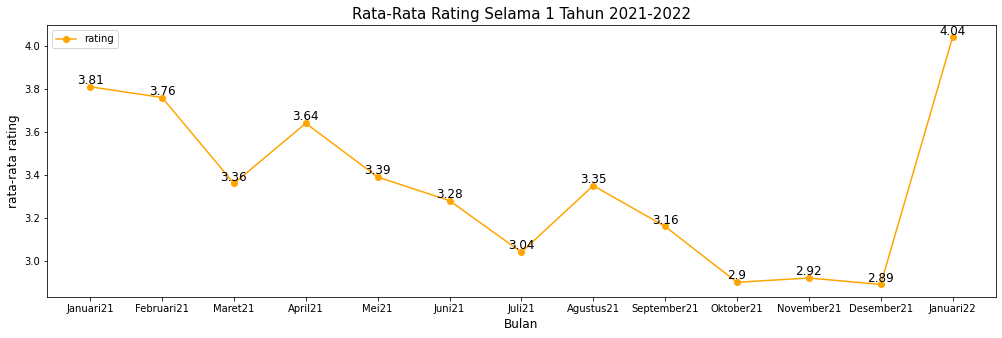

In [21]:
fig = plt.figure (figsize= (17,5))
plt.plot(grafik_rating.Bulan, grafik_rating.Rating, label='rating', color='orange', marker='o')
plt.title('Rata-Rata Rating Selama 1 Tahun 2021-2022', fontsize=15, color='black')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('rata-rata rating', fontsize=12)

def anotation_data (data_y, color_text):
  for i,j in zip(grafik_rating.Bulan, data_y):
    plt.annotate(str(j), xy=(i,j), color=color_text,
                 fontsize='large', weight='normal',
                 horizontalalignment = 'center',
                 verticalalignment='bottom'
                 )
    
anotation_data(grafik_rating.Rating, 'black')

plt.legend()
plt.show()

In [13]:
versi = df_date[["versi", "rating"]]
versi

,versi,rating
0,4.0.8,1
1,4.0.8,5
2,4.0.2,5
3,4.0.8,5
4,4.0.2,5
...,...,...
223537,3.1.2,5
223538,3.1.3,3
223539,3.1.3,2
223540,3.1.3,5


In [14]:
df_date.versi.unique()

array(['4.0.8', '4.0.2', '3.4.6', '4.0.7', '4.0.5', '4.0.6', '3.4.5',
       '3.4.3', '3.4.2', '3.4.1', '3.4.4', '3.3.6', '3.4.0', '3.2.6',
       '1.4.0', '3.1.3', '2.2.1', '3.3.4', '3.0.2', '2.0.3', '2.2.2',
       '3.3.5', '3.1.1', '2.0.0', '2.3.0', '1.2.0', '2.1.4', '1.0.1',
       '1.3.1', '3.1.2', '2.0.2', '1.0', '1.3.0', '2.4.1', '1.1.0'],
      dtype=object)

In [15]:
rating = {}
df_sementara = versi 

for k in versi.versi.unique():
    df_sementara = versi[versi['versi'] == k]
    rating[k] = df_sementara.rating.iloc[0].mean()

print(rating)

{'4.0.8': 1.0, '4.0.2': 5.0, '3.4.6': 5.0, '4.0.7': 5.0, '4.0.5': 5.0, '4.0.6': 5.0, '3.4.5': 1.0, '3.4.3': 5.0, '3.4.2': 5.0, '3.4.1': 5.0, '3.4.4': 4.0, '3.3.6': 5.0, '3.4.0': 5.0, '3.2.6': 5.0, '1.4.0': 5.0, '3.1.3': 5.0, '2.2.1': 1.0, '3.3.4': 5.0, '3.0.2': 5.0, '2.0.3': 3.0, '2.2.2': 2.0, '3.3.5': 4.0, '3.1.1': 1.0, '2.0.0': 1.0, '2.3.0': 4.0, '1.2.0': 5.0, '2.1.4': 5.0, '1.0.1': 4.0, '1.3.1': 3.0, '3.1.2': 5.0, '2.0.2': 5.0, '1.0': 3.0, '1.3.0': 5.0, '2.4.1': 5.0, '1.1.0': 5.0}


In [16]:
df_score_by_version = pd.DataFrame(rating.items())
df_score_by_version

,0,1
0,4.0.8,1.0
1,4.0.2,5.0
2,3.4.6,5.0
3,4.0.7,5.0
4,4.0.5,5.0
5,4.0.6,5.0
6,3.4.5,1.0
7,3.4.3,5.0
8,3.4.2,5.0
9,3.4.1,5.0


<function matplotlib.pyplot.show>

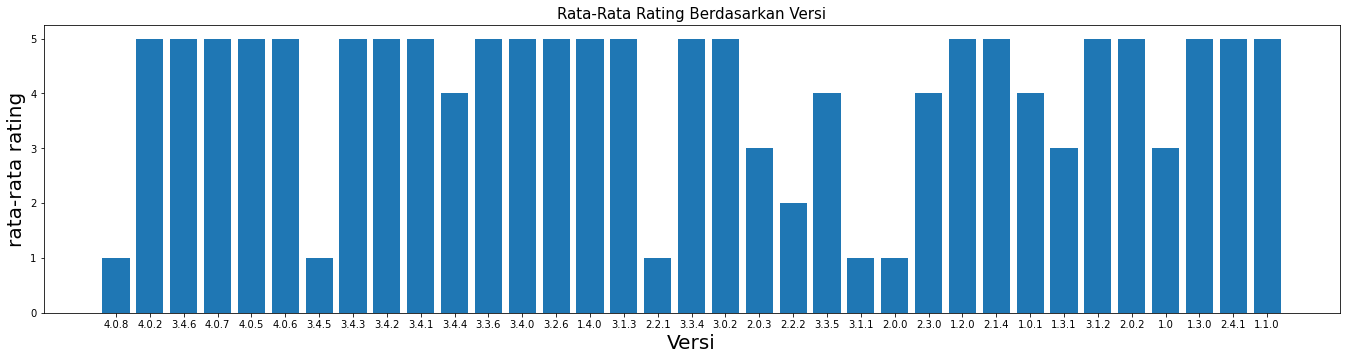

In [17]:
fig = plt.figure()
ax = fig.add_axes([3,1,3,1])
ax.bar(df_score_by_version[0], df_score_by_version[1])
plt.xlabel('Versi', fontsize=20)
plt.ylabel('rata-rata rating', fontsize=20)
plt.title('Rata-Rata Rating Berdasarkan Versi', fontsize=15, color='black')
plt.show